In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.shape

(4177, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [15]:
plt.figure(figsize=(15,12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<AxesSubplot:>

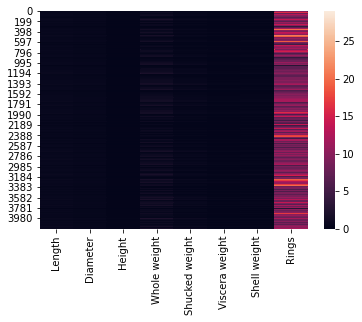

In [16]:
sns.heatmap(df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']])

In [17]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

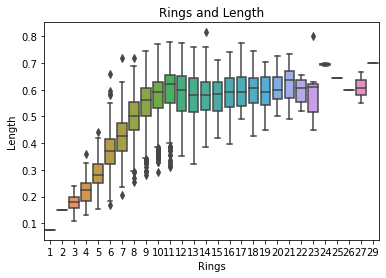

In [20]:
sns.boxplot(x="Rings",y='Length',data=df)
plt.title('Rings and Length')
plt.show()

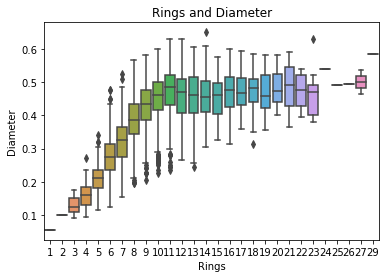

In [21]:
sns.boxplot(x="Rings",y='Diameter',data=df)
plt.title('Rings and Diameter')
plt.show()

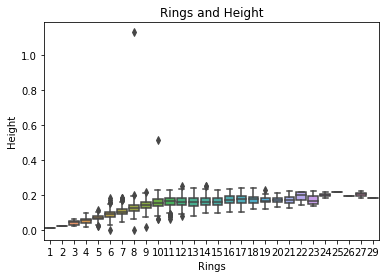

In [22]:
sns.boxplot(x="Rings",y='Height',data=df)
plt.title('Rings and Height')
plt.show()

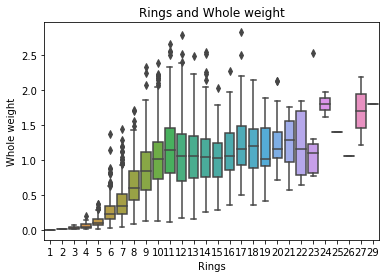

In [23]:
sns.boxplot(x="Rings",y='Whole weight',data=df)
plt.title('Rings and Whole weight')
plt.show()

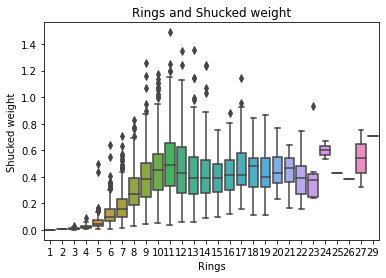

In [24]:
sns.boxplot(x="Rings",y='Shucked weight',data=df)
plt.title('Rings and Shucked weight')
plt.show()

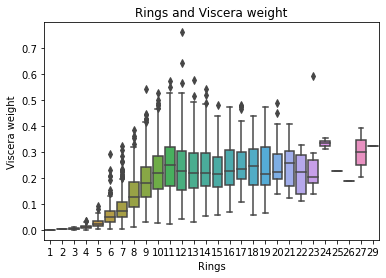

In [25]:
sns.boxplot(x="Rings",y='Viscera weight',data=df)
plt.title('Rings and Viscera weight')
plt.show()

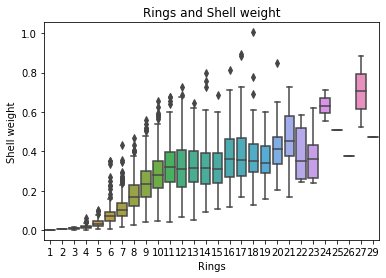

In [26]:
sns.boxplot(x="Rings",y='Shell weight',data=df)
plt.title('Rings and Shell weight')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.linear_model import LogisticRegression

In [36]:
x=df.iloc[:,1:11].values

In [37]:
x

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [48]:
y=df.iloc[:,-1].values

In [49]:
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)

In [55]:
cl = LogisticRegression()
cl.fit(x_train,y_train)

LogisticRegression()

In [57]:
Pred_cl=cl.predict(x_test)

In [58]:
Pred_cl

array([12,  8, 10, ..., 12, 10,  9], dtype=int64)

In [63]:
score=cl.score(x_test,y_test)

In [66]:
score

0.38851674641148326

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
Pred_cl=cl.predict(x_test)

In [75]:
score=cl.score(x_test,y_test)

In [76]:
score

0.9167464114832536

In [78]:
from sklearn.svm import SVC

In [84]:
cl =SVC()
cl.fit(x_train,y_train)

SVC()

In [85]:
score=cl.score(x_test,y_test)

In [86]:
score

0.9406698564593301